# General Information

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import pickle as pickle
from transformers import AutoTokenizer
from load_data import *

## Checking Data

In [10]:
train_data = pd.read_csv('./train/train.csv')
test_data = pd.read_csv('./test/test_data.csv')

In [11]:
train_data

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [12]:
test_data

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree
...,...,...,...,...,...,...
7760,7760,코로나19 방역 조치의 일환으로 국민의 움직임을 통제하려는 정부의 시도를 이탈리아 ...,"{'word': '정부', 'start_idx': 33, 'end_idx': 34,...","{'word': '이탈리아', 'start_idx': 41, 'end_idx': 4...",100,wikitree
7761,7761,선 연구원은 “위식도역류질환치료제인 케이캡이 92억원 판매되면서 2019년 연간 3...,"{'word': '종근당', 'start_idx': 133, 'end_idx': 1...","{'word': '전년', 'start_idx': 143, 'end_idx': 14...",100,wikitree
7762,7762,"한국전기안전공사(사장 조성완)는 8월 1일부로, 3급 간부직원에 대한 승진·이동 인...","{'word': '한국전기안전공사', 'start_idx': 0, 'end_idx'...","{'word': '조성완', 'start_idx': 12, 'end_idx': 14...",100,wikitree
7763,7763,1987년 B. 슈나이더(B. Schneider)에 의해 만들어졌다.,"{'word': 'B. 슈나이더', 'start_idx': 6, 'end_idx':...","{'word': '1987년', 'start_idx': 0, 'end_idx': 4...",100,wikipedia


In [13]:
print(len(train_data))
print(len(train_data.drop_duplicates()))

print()

print(len(test_data))
print(len(test_data.drop_duplicates()))

32470
32470

7765
7765


## Checking Labels

In [15]:
train_labels = train_data.label
train_labels

0                      no_relation
1                      no_relation
2                    org:member_of
3        org:top_members/employees
4                      no_relation
                   ...            
32465              per:employee_of
32466               per:colleagues
32467    org:top_members/employees
32468                  no_relation
32469    org:top_members/employees
Name: label, Length: 32470, dtype: object

In [16]:
train_labels_uniq = train_labels.unique()
train_labels_uniq

array(['no_relation', 'org:member_of', 'org:top_members/employees',
       'org:alternate_names', 'per:date_of_birth',
       'org:place_of_headquarters', 'per:employee_of', 'per:origin',
       'per:title', 'org:members', 'per:schools_attended',
       'per:colleagues', 'per:alternate_names', 'per:spouse',
       'org:founded_by', 'org:political/religious_affiliation',
       'per:children', 'org:founded', 'org:number_of_employees/members',
       'per:place_of_birth', 'org:dissolved', 'per:parents',
       'per:religion', 'per:date_of_death', 'per:place_of_residence',
       'per:other_family', 'org:product', 'per:siblings', 'per:product',
       'per:place_of_death'], dtype=object)

In [17]:
train_labels.nunique()

30

In [18]:
train_labels_dict = {'no_relation': 0, 
                     'org:top_members/employees': 1, 
                     'org:members': 2, 
                     'org:product': 3, 
                     'per:title': 4, 
                     'org:alternate_names': 5, 
                     'per:employee_of': 6, 
                     'org:place_of_headquarters': 7, 
                     'per:product': 8, 
                     'org:number_of_employees/members': 9, 
                     'per:children': 10, 
                     'per:place_of_residence': 11, 
                     'per:alternate_names': 12, 
                     'per:other_family': 13, 
                     'per:colleagues': 14, 
                     'per:origin': 15, 
                     'per:siblings': 16, 
                     'per:spouse': 17, 
                     'org:founded': 18, 
                     'org:political/religious_affiliation': 19, 
                     'org:member_of': 20, 
                     'per:parents': 21, 
                     'org:dissolved': 22, 
                     'per:schools_attended': 23, 
                     'per:date_of_death': 24, 
                     'per:date_of_birth': 25, 
                     'per:place_of_birth': 26, 
                     'per:place_of_death': 27, 
                     'org:founded_by': 28, 
                     'per:religion': 29}

label2nick = {0: 'nr',
              1: 'o:t_m/e',
              2: 'o:m',
              3: 'o:p',
              4: 'p:t',
              5: 'o:a_n',
              6: 'o:e_o',
              7: 'o:p_o_h',
              8: 'p:pr',
              9: 'o:n_o_e/m',
             10: 'p:ch',
             11: 'p:p_o_r',
             12: 'p:a_n',
             13: 'p:o_f',
             14: 'p:co',
             15: 'p:o',
             16: 'p:si',
             17: 'p:sp',
             18: 'o:f',
             19: 'o:p/r_a',
             20: 'o:m_o',
             21: 'p:pa',
             22: 'o:d',
             23: 'p:s_a',
             24: 'p:d_o_d',
             25: 'p:d_o_b',
             26: 'p:p_o_b',
             27: 'p:p_o_d',
             28: 'o:f_b',
             29: 'p:r'}

name2nick = {}
for tld in train_labels_dict.items():
    name2nick[tld[0]] = label2nick[tld[1]]
name2nick

{'no_relation': 'nr',
 'org:top_members/employees': 'o:t_m/e',
 'org:members': 'o:m',
 'org:product': 'o:p',
 'per:title': 'p:t',
 'org:alternate_names': 'o:a_n',
 'per:employee_of': 'o:e_o',
 'org:place_of_headquarters': 'o:p_o_h',
 'per:product': 'p:pr',
 'org:number_of_employees/members': 'o:n_o_e/m',
 'per:children': 'p:ch',
 'per:place_of_residence': 'p:p_o_r',
 'per:alternate_names': 'p:a_n',
 'per:other_family': 'p:o_f',
 'per:colleagues': 'p:co',
 'per:origin': 'p:o',
 'per:siblings': 'p:si',
 'per:spouse': 'p:sp',
 'org:founded': 'o:f',
 'org:political/religious_affiliation': 'o:p/r_a',
 'org:member_of': 'o:m_o',
 'per:parents': 'p:pa',
 'org:dissolved': 'o:d',
 'per:schools_attended': 'p:s_a',
 'per:date_of_death': 'p:d_o_d',
 'per:date_of_birth': 'p:d_o_b',
 'per:place_of_birth': 'p:p_o_b',
 'per:place_of_death': 'p:p_o_d',
 'org:founded_by': 'o:f_b',
 'per:religion': 'p:r'}

In [19]:
train_labels_num_dict = defaultdict(int)
for train_label in train_labels:
    train_labels_num_dict[name2nick[train_label]] += 1
    
train_labels_num_dict # tlnd

defaultdict(int,
            {'nr': 9534,
             'o:m_o': 1866,
             'o:t_m/e': 4284,
             'o:a_n': 1320,
             'p:d_o_b': 1130,
             'o:p_o_h': 1195,
             'o:e_o': 3573,
             'p:o': 1234,
             'p:t': 2103,
             'o:m': 420,
             'p:s_a': 82,
             'p:co': 534,
             'p:a_n': 1001,
             'p:sp': 795,
             'o:f_b': 155,
             'o:p/r_a': 98,
             'p:ch': 304,
             'o:f': 450,
             'o:n_o_e/m': 48,
             'p:p_o_b': 166,
             'o:d': 66,
             'p:pa': 520,
             'p:r': 96,
             'p:d_o_d': 418,
             'p:p_o_r': 193,
             'p:o_f': 190,
             'o:p': 380,
             'p:si': 136,
             'p:pr': 139,
             'p:p_o_d': 40})

In [20]:
print("max: ", max(train_labels_num_dict.values()))
print("min: ", min(train_labels_num_dict.values()))

max:  9534
min:  40


In [21]:
tlnd4plt_sorted = sorted(train_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
tlnd4plt_sorted_keys = [ts[0] for ts in tlnd4plt_sorted]
print(tlnd4plt_sorted_keys)
tlnd4plt_sorted_values = [ts[1] for ts in tlnd4plt_sorted]
print(tlnd4plt_sorted_values)

['nr', 'o:t_m/e', 'o:e_o', 'p:t', 'o:m_o', 'o:a_n', 'p:o', 'o:p_o_h', 'p:d_o_b', 'p:a_n', 'p:sp', 'p:co', 'p:pa', 'o:f', 'o:m', 'p:d_o_d', 'o:p', 'p:ch', 'p:p_o_r', 'p:o_f', 'p:p_o_b', 'o:f_b', 'p:pr', 'p:si', 'o:p/r_a', 'p:r', 'p:s_a', 'o:d', 'o:n_o_e/m', 'p:p_o_d']
[9534, 4284, 3573, 2103, 1866, 1320, 1234, 1195, 1130, 1001, 795, 534, 520, 450, 420, 418, 380, 304, 193, 190, 166, 155, 139, 136, 98, 96, 82, 66, 48, 40]


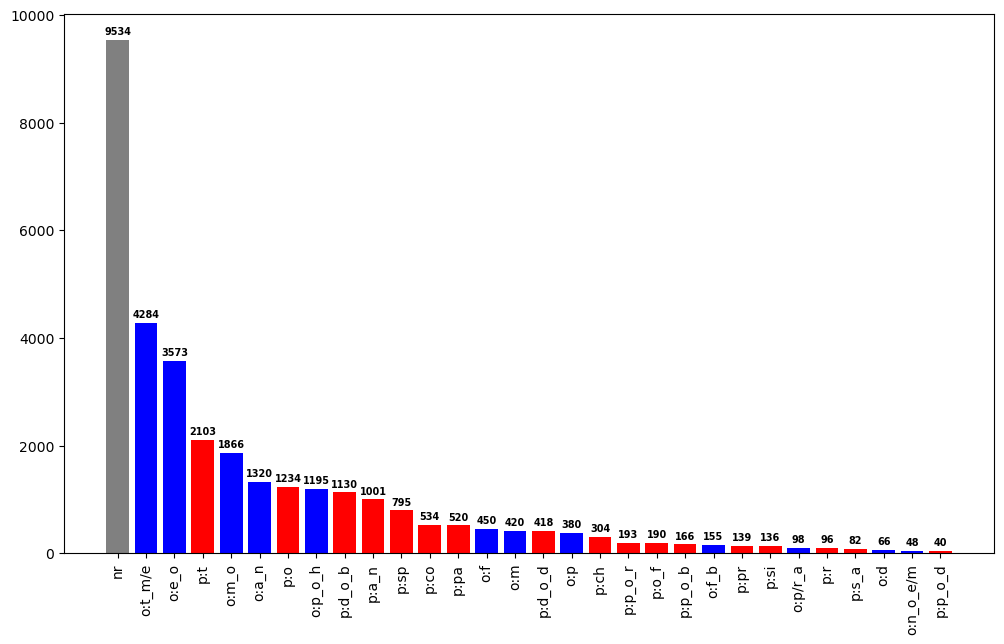

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = []
for tlnd in tlnd4plt_sorted_keys:
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
ax.bar(tlnd4plt_sorted_keys, tlnd4plt_sorted_values, color=clist)
plt.xticks(rotation='vertical')

for idx, value in enumerate(tlnd4plt_sorted_values):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=7)
    
plt.show()

In [27]:
train_labels_nop = defaultdict(int)
train_labels_n = defaultdict(int)
train_labels_o = defaultdict(int)
train_labels_p = defaultdict(int)
for tlnd_k, tlnd_v in train_labels_num_dict.items():
    if tlnd_k.startswith('o'):
        train_labels_nop["ORG"] += tlnd_v
        train_labels_o[tlnd_k] += tlnd_v
    elif tlnd_k.startswith('p'):
        train_labels_nop["PER"] += tlnd_v
        train_labels_p[tlnd_k] += tlnd_v
    else:
        train_labels_nop["NR"] += tlnd_v
        train_labels_n[tlnd_k] += tlnd_v
        
train_labels_nop

defaultdict(int, {'NR': 9534, 'ORG': 13855, 'PER': 9081})

In [28]:
train_labels_o

defaultdict(int,
            {'o:m_o': 1866,
             'o:t_m/e': 4284,
             'o:a_n': 1320,
             'o:p_o_h': 1195,
             'o:e_o': 3573,
             'o:m': 420,
             'o:f_b': 155,
             'o:p/r_a': 98,
             'o:f': 450,
             'o:n_o_e/m': 48,
             'o:d': 66,
             'o:p': 380})

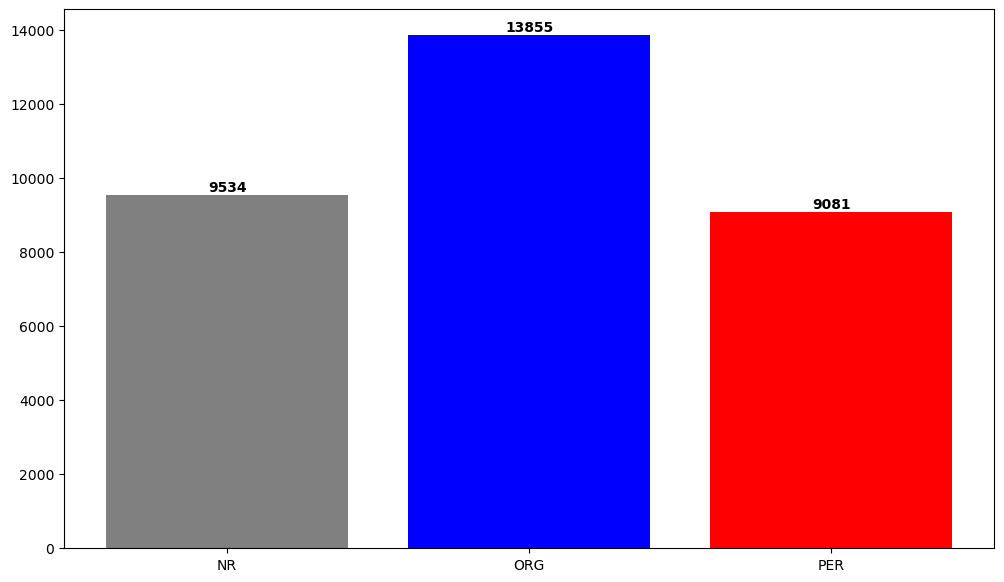

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = ['gray', 'blue', 'red']
ax.bar(train_labels_nop.keys(), train_labels_nop.values(), color=clist)

for idx, value in enumerate(train_labels_nop.values()):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=10)
    
plt.show()

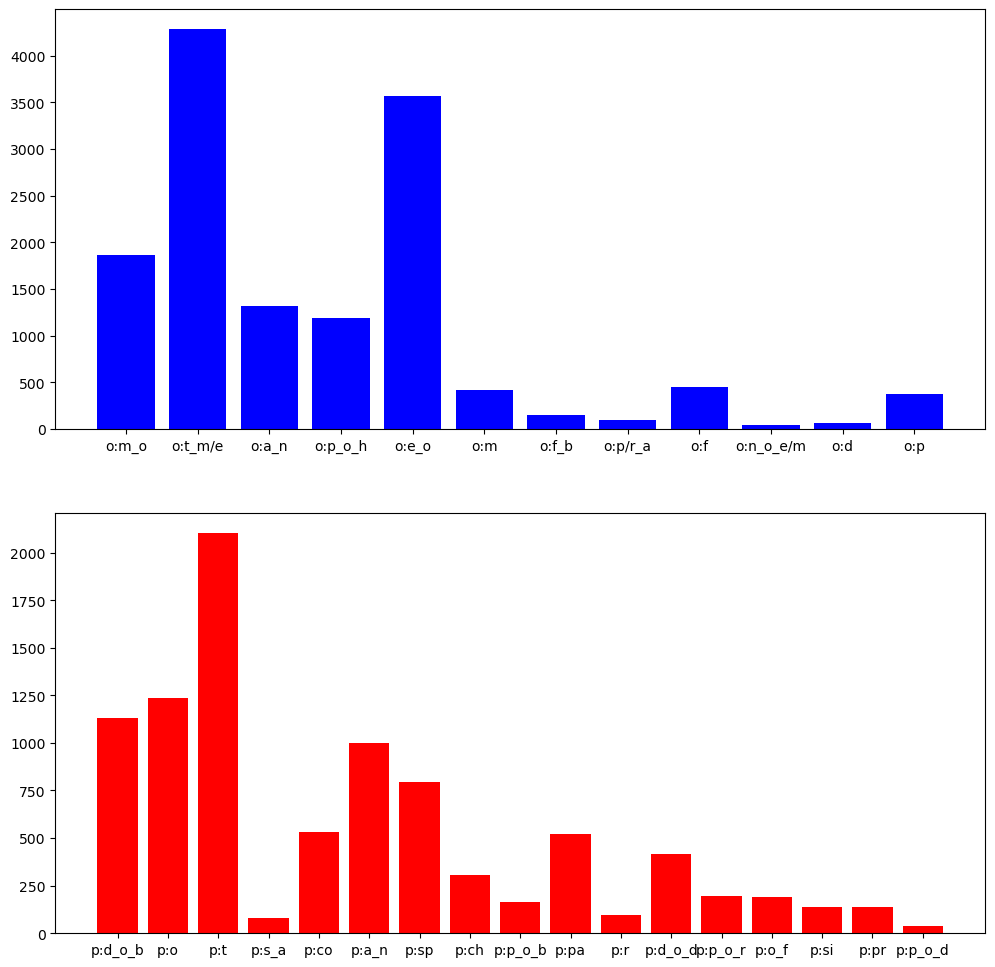

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

axes[0].bar(train_labels_o.keys(), train_labels_o.values(), color='blue')
for idx, value in enumerate(train_labels_o.values()):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=10)
    
axes[1].bar(train_labels_p.keys(), train_labels_p.values(), color='red')
for idx, value in enumerate(train_labels_p.values()):
    ax.text(idx, value+100, s=value, ha='center', fontweight='bold', fontsize=10)
    
plt.show()

## Checking Sources

### Total Data's Source Distribution

In [131]:
train_sources = train_data.source
test_sources = test_data.source
train_sources

0        wikipedia
1         wikitree
2         wikitree
3         wikitree
4        wikipedia
           ...    
32465     wikitree
32466    wikipedia
32467     wikitree
32468    wikipedia
32469     wikitree
Name: source, Length: 32470, dtype: object

In [132]:
train_sources_num_dict = defaultdict(int)
test_sources_num_dict = defaultdict(int)
for train_source in train_sources:
    train_sources_num_dict[train_source] += 1
for test_source in test_sources:
    test_sources_num_dict[test_source] += 1

In [133]:
train_sources_num_dict # train_snd

defaultdict(int,
            {'wikipedia': 21620, 'wikitree': 10672, 'policy_briefing': 178})

In [134]:
test_sources_num_dict # test_snd

defaultdict(int, {'wikitree': 4088, 'wikipedia': 3621, 'policy_briefing': 56})

In [137]:
print("Train Data Sources")
train_snd4plt_sorted = sorted(train_sources_num_dict.items(), reverse=True, key=lambda x: x[1])
train_snd4plt_sorted_keys = [ts[0] for ts in train_snd4plt_sorted]
print(train_snd4plt_sorted_keys)
train_snd4plt_sorted_values = [ts[1] for ts in train_snd4plt_sorted]
print(train_snd4plt_sorted_values)

print("\nTest Data Sources")
test_snd4plt_sorted = sorted(test_sources_num_dict.items(), reverse=True, key=lambda x: x[1])
test_snd4plt_sorted_keys = [ts[0] for ts in test_snd4plt_sorted]
print(test_snd4plt_sorted_keys)
test_snd4plt_sorted_values = [ts[1] for ts in test_snd4plt_sorted]
print(test_snd4plt_sorted_values)

Train Data Sources
['wikipedia', 'wikitree', 'policy_briefing']
[21620, 10672, 178]

Test Data Sources
['wikitree', 'wikipedia', 'policy_briefing']
[4088, 3621, 56]


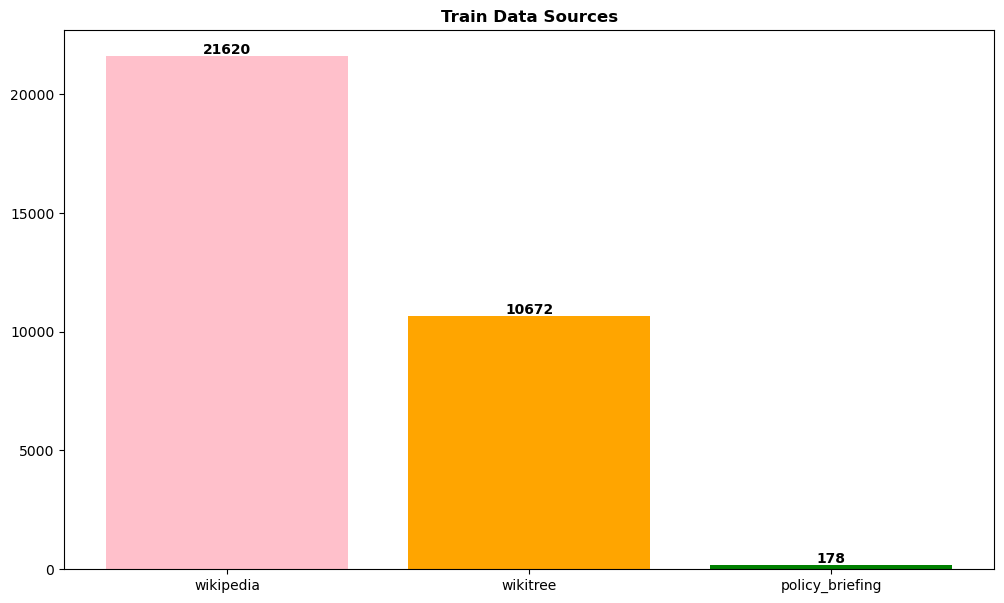

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = ['pink', 'orange', 'green']
ax.bar(train_snd4plt_sorted_keys, train_snd4plt_sorted_values, color=clist)
ax.set_title("Train Data Sources", fontweight='bold')

for idx, value in enumerate(train_snd4plt_sorted_values):
    ax.text(x=idx, y=value+100, s=value, ha='center', fontweight='bold')
    
plt.show()

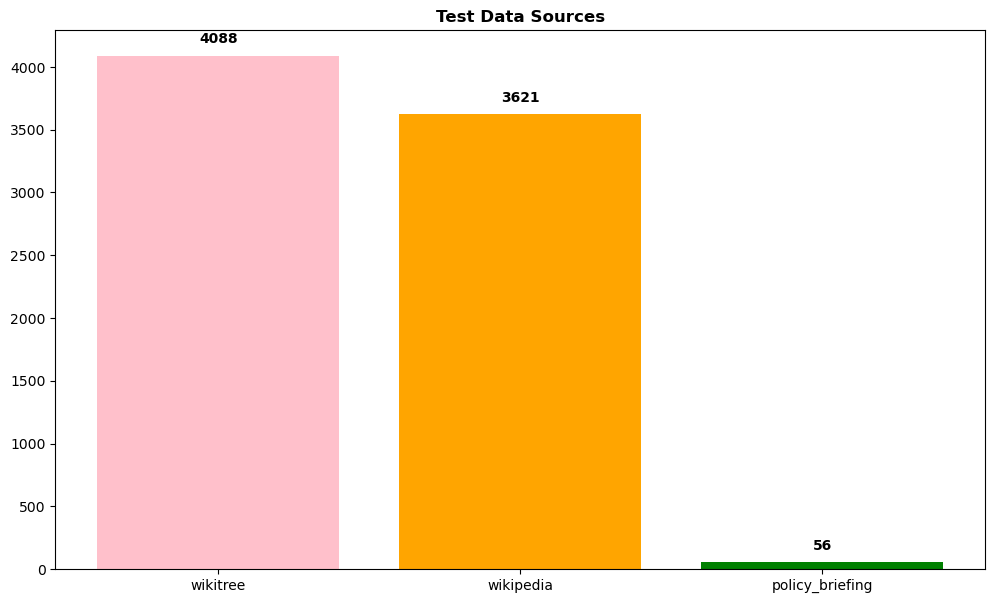

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
clist = ['pink', 'orange', 'green']
ax.bar(test_snd4plt_sorted_keys, test_snd4plt_sorted_values, color=clist)
ax.set_title("Test Data Sources", fontweight='bold')

for idx, value in enumerate(test_snd4plt_sorted_values):
    ax.text(x=idx, y=value+100, s=value, ha='center', fontweight='bold')
    
plt.show()

### Label Distribution of Each Source

In [202]:
pedia_train = train_data[train_data['source'] == 'wikipedia']
tree_train = train_data[train_data['source'] == 'wikitree']
policy_train = train_data[train_data['source'] == 'policy_briefing']

In [204]:
policy_train.sample(10)

,id,sentence,subject_entity,object_entity,label,source
11856,11856,베트남 측은 베트남항공의 인천-하노이 노선에서 25일 시범운항을 추진할 계획이고 우...,"{'word': '베트남', 'start_idx': 7, 'end_idx': 9, ...","{'word': '하노이', 'start_idx': 17, 'end_idx': 19...",no_relation,policy_briefing
13532,13532,박능후 중앙재난안전대책본부 1차장(보건복지부 장관)이 13일 오후 정부서울청사 합동...,"{'word': '박능후', 'start_idx': 0, 'end_idx': 2, ...","{'word': '보건복지부 장관', 'start_idx': 19, 'end_idx...",per:title,policy_briefing
3752,3752,전세계적인 경제위기 속에서도 한국 경제는 올해 OECD 37개국 가운데 성장률 1위...,"{'word': 'OECD', 'start_idx': 26, 'end_idx': 2...","{'word': '37개국', 'start_idx': 31, 'end_idx': 3...",org:number_of_employees/members,policy_briefing
30513,30513,문재인 대통령과 부인 김정숙 여사가 지난 19일 오전 청와대 녹지원에서 열린 제1회...,"{'word': '김정숙', 'start_idx': 12, 'end_idx': 14...","{'word': '문재인', 'start_idx': 0, 'end_idx': 2, ...",per:spouse,policy_briefing
13936,13936,행사에서 문재인 대통령은 최기영 과기정통부 장관이 대독한 서면 축사를 통해 “지식재...,"{'word': '과기정통부', 'start_idx': 18, 'end_idx': ...","{'word': '최기영', 'start_idx': 14, 'end_idx': 16...",org:top_members/employees,policy_briefing
26952,26952,손병두 금융위원회 부위원장은 24일 서울 중구 은행회관에서 금융리스크 대응반 회의를...,"{'word': '금융위원회', 'start_idx': 4, 'end_idx': 8...","{'word': '손병두', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,policy_briefing
25224,25224,정부는 13일 홍남기 부총리 겸 기획재정부 주재로 열린 제13차 비상경제 중앙대책본...,"{'word': '기획재정부', 'start_idx': 18, 'end_idx': ...","{'word': '홍남기', 'start_idx': 8, 'end_idx': 10,...",org:top_members/employees,policy_briefing
9769,9769,박양우 문화체육관광부 장관은 “콘텐츠산업은 디지털 전환의 최전선에서 혁신과 창의적 ...,"{'word': '문화체육관광부', 'start_idx': 4, 'end_idx':...","{'word': '박양우', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,policy_briefing
10524,10524,"정은경 중앙방역대책본부장(질병관리본부장, 오른쪽부터), 김강립 중앙재난안전대책본부 ...","{'word': '보건복지부', 'start_idx': 84, 'end_idx': ...","{'word': '정은경', 'start_idx': 0, 'end_idx': 2, ...",no_relation,policy_briefing
14106,14106,"이와 함께 환경부는 전국 지자체, 한국환경공단과 함께 15일부터 약 2주간 제품·포...","{'word': '한국환경공단', 'start_idx': 19, 'end_idx':...","{'word': '환경부', 'start_idx': 6, 'end_idx': 8, ...",no_relation,policy_briefing


In [206]:
pedia_train_labels = pedia_train.label
pedia_train_labels_uniq = pedia_train_labels.unique()
tree_train_labels = tree_train.label
tree_train_labels_uniq = tree_train_labels.unique()
policy_train_labels = policy_train.label
policy_train_labels_uniq = policy_train_labels.unique()

In [207]:
print(len(pedia_train_labels_uniq))
print(len(tree_train_labels_uniq))
print(len(policy_train_labels_uniq))

30
29
10


In [216]:
template_labels_num_dict = defaultdict(int)
for _, nick in label2nick.items():
    template_labels_num_dict[nick] = 0

template_labels_num_dict

defaultdict(int,
            {'nr': 0,
             'o:t_m/e': 0,
             'o:m': 0,
             'o:p': 0,
             'p:t': 0,
             'o:a_n': 0,
             'o:e_o': 0,
             'o:p_o_h': 0,
             'p:pr': 0,
             'o:n_o_e/m': 0,
             'p:ch': 0,
             'p:p_o_r': 0,
             'p:a_n': 0,
             'p:o_f': 0,
             'p:co': 0,
             'p:o': 0,
             'p:si': 0,
             'p:sp': 0,
             'o:f': 0,
             'o:p/r_a': 0,
             'o:m_o': 0,
             'p:pa': 0,
             'o:d': 0,
             'p:s_a': 0,
             'p:d_o_d': 0,
             'p:d_o_b': 0,
             'p:p_o_b': 0,
             'p:p_o_d': 0,
             'o:f_b': 0,
             'p:r': 0})

In [218]:
pedia_labels_num_dict = template_labels_num_dict.copy()
for pedia_label in pedia_train_labels:
    pedia_labels_num_dict[name2nick[pedia_label]] += 1
    
pedia_labels_num_dict # pedia_lnd

defaultdict(int,
            {'nr': 7382,
             'o:t_m/e': 949,
             'o:m': 298,
             'o:p': 156,
             'p:t': 1208,
             'o:a_n': 899,
             'o:e_o': 1968,
             'o:p_o_h': 991,
             'p:pr': 113,
             'o:n_o_e/m': 25,
             'p:ch': 268,
             'p:p_o_r': 152,
             'p:a_n': 513,
             'p:o_f': 190,
             'p:co': 432,
             'p:o': 1143,
             'p:si': 122,
             'p:sp': 433,
             'o:f': 411,
             'o:p/r_a': 96,
             'o:m_o': 1275,
             'p:pa': 500,
             'o:d': 65,
             'p:s_a': 72,
             'p:d_o_d': 412,
             'p:d_o_b': 1122,
             'p:p_o_b': 162,
             'p:p_o_d': 39,
             'o:f_b': 130,
             'p:r': 94})

In [219]:
tree_labels_num_dict = template_labels_num_dict.copy()
for tree_label in tree_train_labels:
    tree_labels_num_dict[name2nick[tree_label]] += 1
    
tree_labels_num_dict # tree_lnd

defaultdict(int,
            {'nr': 2122,
             'o:t_m/e': 3235,
             'o:m': 121,
             'o:p': 224,
             'p:t': 876,
             'o:a_n': 415,
             'o:e_o': 1599,
             'o:p_o_h': 202,
             'p:pr': 26,
             'o:n_o_e/m': 20,
             'p:ch': 36,
             'p:p_o_r': 41,
             'p:a_n': 488,
             'p:o_f': 0,
             'p:co': 102,
             'p:o': 91,
             'p:si': 14,
             'p:sp': 359,
             'o:f': 39,
             'o:p/r_a': 2,
             'o:m_o': 583,
             'p:pa': 20,
             'o:d': 1,
             'p:s_a': 10,
             'p:d_o_d': 6,
             'p:d_o_b': 8,
             'p:p_o_b': 4,
             'p:p_o_d': 1,
             'o:f_b': 25,
             'p:r': 2})

In [220]:
policy_labels_num_dict = template_labels_num_dict.copy()
for policy_label in policy_train_labels:
    policy_labels_num_dict[name2nick[policy_label]] += 1
    
policy_labels_num_dict # tree_lnd

defaultdict(int,
            {'nr': 30,
             'o:t_m/e': 100,
             'o:m': 1,
             'o:p': 0,
             'p:t': 19,
             'o:a_n': 6,
             'o:e_o': 6,
             'o:p_o_h': 2,
             'p:pr': 0,
             'o:n_o_e/m': 3,
             'p:ch': 0,
             'p:p_o_r': 0,
             'p:a_n': 0,
             'p:o_f': 0,
             'p:co': 0,
             'p:o': 0,
             'p:si': 0,
             'p:sp': 3,
             'o:f': 0,
             'o:p/r_a': 0,
             'o:m_o': 8,
             'p:pa': 0,
             'o:d': 0,
             'p:s_a': 0,
             'p:d_o_d': 0,
             'p:d_o_b': 0,
             'p:p_o_b': 0,
             'p:p_o_d': 0,
             'o:f_b': 0,
             'p:r': 0})

In [224]:
# pedia_lnd4plt_sorted = sorted(pedia_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
# tree_lnd4plt_sorted = sorted(tree_labels_num_dict.items(), reverse=True, key=lambda x: x[1])
# policy_lnd4plt_sorted = sorted(policy_labels_num_dict.items(), reverse=True, key=lambda x: x[1])

# pedia_lnd4plt_sorted_keys = [lnd[0] for lnd in pedia_lnd4plt_sorted]
# pedia_lnd4plt_sorted_values = [lnd[1] for lnd in pedia_lnd4plt_sorted]
# tree_lnd4plt_sorted_keys = [lnd[0] for lnd in tree_lnd4plt_sorted]
# tree_lnd4plt_sorted_values = [lnd[1] for lnd in tree_lnd4plt_sorted]
# policy_lnd4plt_sorted_keys = [lnd[0] for lnd in policy_lnd4plt_sorted]
# policy_lnd4plt_sorted_values = [lnd[1] for lnd in policy_lnd4plt_sorted]

/tmp/ipykernel_6593/1455781797.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(template_labels_num_dict.keys(), rotation='vertical', fontsize=7)


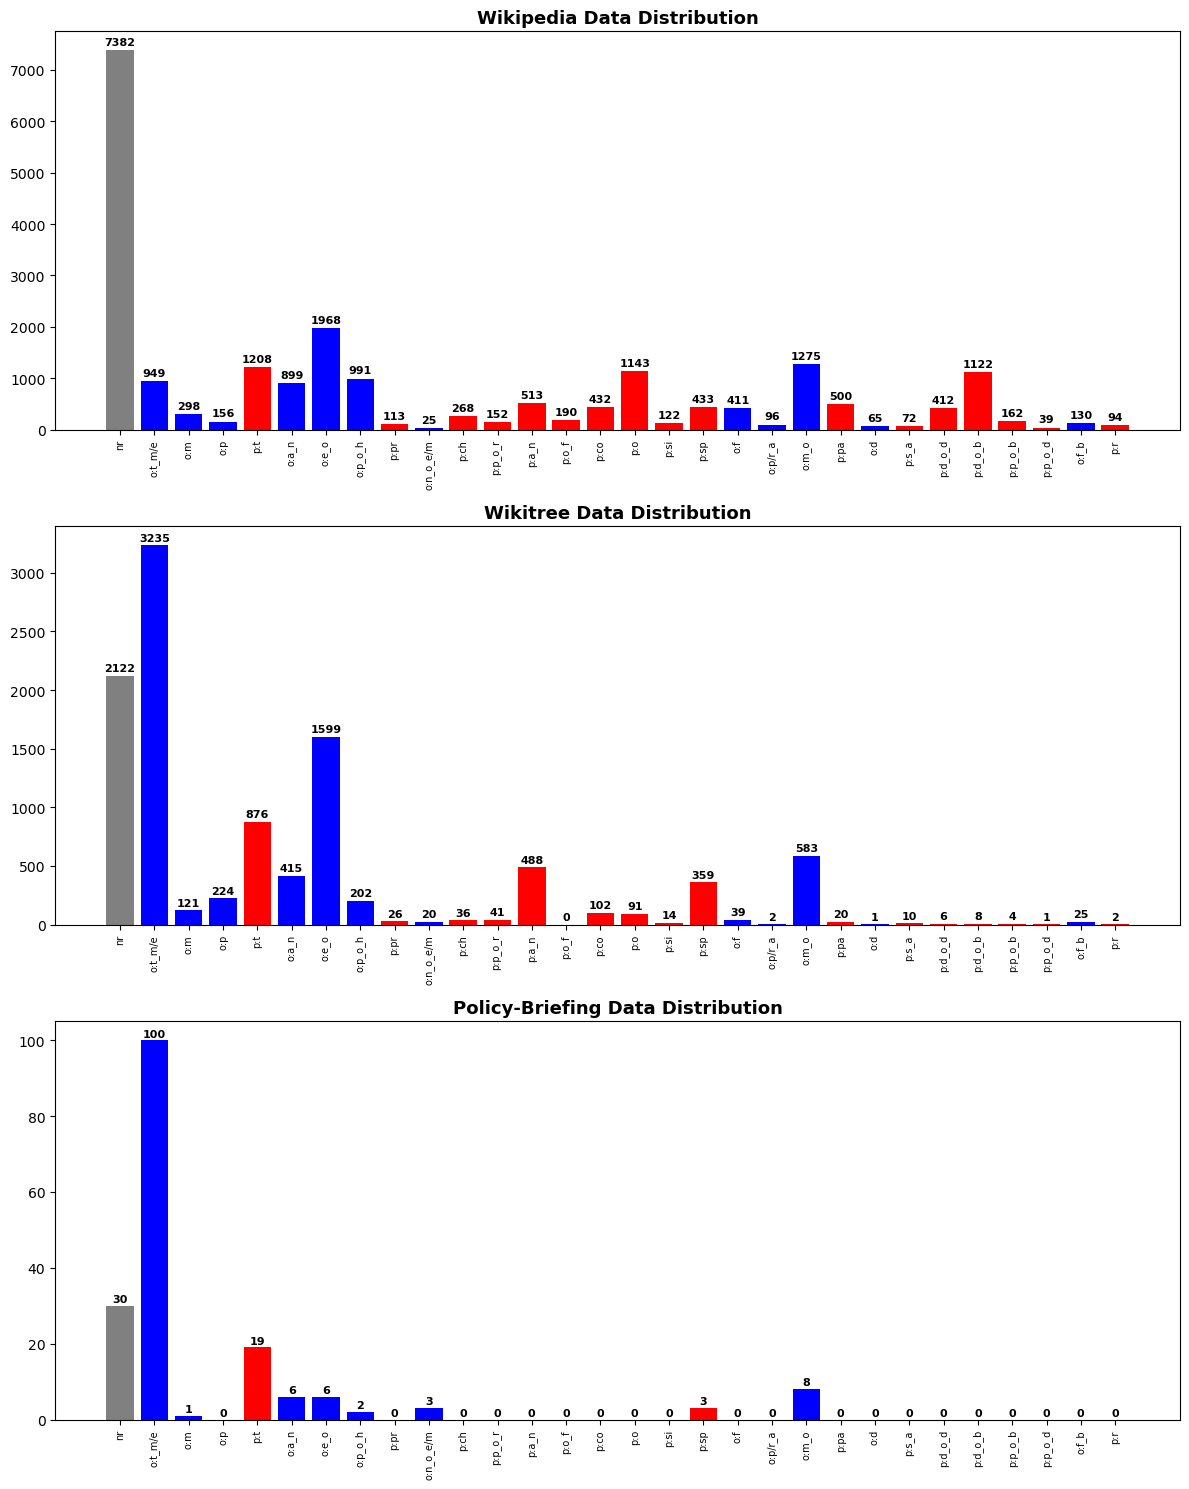

In [246]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
clist = []
for tlnd in template_labels_num_dict.keys():
    if tlnd.startswith('o'):
        clist.append('blue')
    elif tlnd.startswith('p'):
        clist.append('red')
    else:
        clist.append('gray')
axes[0].bar(template_labels_num_dict.keys(), pedia_labels_num_dict.values(), color=clist)
axes[1].bar(template_labels_num_dict.keys(), tree_labels_num_dict.values(), color=clist)
axes[2].bar(template_labels_num_dict.keys(), policy_labels_num_dict.values(), color=clist)

values = [pedia_labels_num_dict.values(), tree_labels_num_dict.values(), policy_labels_num_dict.values()]
margins = [100, 40, 1]
titles = ['Wikipedia', 'Wikitree', 'Policy-Briefing']
for ax, value, margin, title in zip(axes, values, margins, titles):
    ax.set_title(title + " Data Distribution", fontweight='bold', fontsize=13)
    ax.set_xticklabels(template_labels_num_dict.keys(), rotation='vertical', fontsize=7)
    for idx, value in enumerate(value):
        ax.text(idx, value + margin, s=value, ha='center', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

## Checking Sentence Lengths

In [96]:
train_data.sample(10)

,id,sentence,subject_entity,object_entity,label,source
11163,11163,"헤로도토스는 어떤 이는 4천명의 그리스군이 죽었다고 하지만, 산길을 경계하던 포키스...","{'word': '포키스', 'start_idx': 43, 'end_idx': 45...","{'word': '그리스', 'start_idx': 94, 'end_idx': 96...",no_relation,wikipedia
31740,31740,이강인과 함께 '코파 트로피' 최종 후보 10인에 이름을 올린 선수들은 주앙 펠릭스...,"{'word': '사무엘 추쿠에제', 'start_idx': 145, 'end_id...","{'word': '비야레알', 'start_idx': 154, 'end_idx': ...",per:employee_of,wikitree
9240,9240,강동훈(음력 1982년 3월 26일~)은 대한민국의 리그 오브 레전드 프로게임단 감...,"{'word': '강동훈', 'start_idx': 0, 'end_idx': 2, ...","{'word': '프로게임단 감독', 'start_idx': 39, 'end_idx...",per:title,wikipedia
22583,22583,경상북도청(慶尙北道廳)은 경상북도의 행정을 총괄하는 지방행정기관으로 경상북도 안동시...,"{'word': '경상북도청', 'start_idx': 0, 'end_idx': 4...","{'word': '안동시 풍천면 도청대로 455', 'start_idx': 43, ...",org:place_of_headquarters,wikipedia
11784,11784,제7회 전국동시지방선거에서도 박남춘 현 인천광역시장이 1위를 못했던 곳 역시 바로 ...,"{'word': '박남춘', 'start_idx': 16, 'end_idx': 18...","{'word': '인천광역시', 'start_idx': 22, 'end_idx': ...",per:employee_of,wikipedia
20331,20331,"1997년과 1998년에는 한 해 동안 한보철강 (現 현대제철), 삼미그룹, 진로그...","{'word': '강원산업', 'start_idx': 188, 'end_idx': ...","{'word': '현대제철', 'start_idx': 30, 'end_idx': 3...",no_relation,wikipedia
32125,32125,이 외에도 핀란드의 멜로딕 데스 메탈 밴드 칠드런 오브 보돔의 알렉시 라이호도 노래...,"{'word': '칠드런 오브 보돔', 'start_idx': 24, 'end_id...","{'word': '핀란드', 'start_idx': 6, 'end_idx': 8, ...",org:place_of_headquarters,wikipedia
25926,25926,"우리은행은 국내 IB(투자은행)그룹, 베트남우리은행 등과 협업을 통해 비엣젯의 '에...","{'word': '베트남우리은행', 'start_idx': 21, 'end_idx'...","{'word': '1억4000만달러', 'start_idx': 65, 'end_id...",no_relation,wikitree
5627,5627,"비슷한 문맥에서 베를렌은 스테판 말라르메(Stéphane Mallarmé), 아르튀...","{'word': '베를렌', 'start_idx': 9, 'end_idx': 11,...","{'word': '아르튀르 랭보', 'start_idx': 43, 'end_idx'...",no_relation,wikipedia
2780,2780,"특히 아이스하키(NHL)에서는 공식적으로 싸움이 허용되지만, 선수들은 무조건 맨손으...","{'word': 'NHL', 'start_idx': 9, 'end_idx': 11,...","{'word': '아이스하키', 'start_idx': 3, 'end_idx': 7...",org:alternate_names,wikitree


In [97]:
test_data.sample(10)

,id,sentence,subject_entity,object_entity,label,source
649,649,이에 따라 삼성전자는 일본 정부의 '한국 수출 규제 대상'에 오른 3개 핵심 소재 ...,"{'word': '삼성전자', 'start_idx': 6, 'end_idx': 9,...","{'word': '일본 정부', 'start_idx': 12, 'end_idx': ...",100,wikitree
5990,5990,"엠비아이는 ‘서울국제발명전시회’에서 '파워트레인(POWERTRAIN)""'으로 영예의...","{'word': '엠비아이', 'start_idx': 0, 'end_idx': 3,...","{'word': '파워트레인', 'start_idx': 21, 'end_idx': ...",100,wikitree
6581,6581,"그들은 ""아니 오른손 왜 거기에 올리는데"", ""진짜 손이 왜 저기 가 있냐"", ""그...","{'word': '권창훈', 'start_idx': 63, 'end_idx': 65...","{'word': '선수', 'start_idx': 67, 'end_idx': 68,...",100,wikitree
7735,7735,김 연구원은 “현대해상은 과거 실손보험 비중이 커 보험료 인상 규제로 인해 위험손해...,"{'word': '현대해상', 'start_idx': 8, 'end_idx': 11...","{'word': '연구원', 'start_idx': 2, 'end_idx': 4, ...",100,wikitree
7497,7497,"상해 총영사관의 외무성 경찰사에서는 ""윤봉길은 두들겨 맞고 기절해 군인과 헌병의 힘...","{'word': '외무성', 'start_idx': 9, 'end_idx': 11,...","{'word': '군인', 'start_idx': 37, 'end_idx': 38,...",100,wikipedia
6734,6734,DB금융투자는 19일 삼성엔지니어링에 대해 현재 업황과는 무관한 수주 성장세를 시현...,"{'word': 'DB금융투자', 'start_idx': 0, 'end_idx': ...","{'word': '19일', 'start_idx': 8, 'end_idx': 10,...",100,wikitree
479,479,서울성경신학대학원대학교는 6.25 전쟁이 발발하자 목회자와 성도들이 경남 거제도로 ...,"{'word': '하나님', 'start_idx': 63, 'end_idx': 65...","{'word': '거제도', 'start_idx': 41, 'end_idx': 43...",100,wikipedia
84,84,"공안의 사인, 강릉의 미방도 항복시켰다.","{'word': '공안', 'start_idx': 0, 'end_idx': 1, '...","{'word': '강릉', 'start_idx': 8, 'end_idx': 9, '...",100,wikipedia
7020,7020,"한편 진도군은 부군수를 단장으로 신속집행 추진단을 구성, 추진상황 점검회의 개최와 ...","{'word': '진도군', 'start_idx': 3, 'end_idx': 5, ...","{'word': '부군수', 'start_idx': 8, 'end_idx': 10,...",100,wikitree
3366,3366,"유명한 드레이크 방정식을 고안한 사람이며, 당시 코넬 대학교 소속이었던 프랭크 드레...","{'word': '코넬 대학교', 'start_idx': 27, 'end_idx':...","{'word': '프랭크 드레이크', 'start_idx': 40, 'end_idx...",100,wikipedia


In [98]:
train_sentences = train_data.sentence
train_subjects = train_data.subject_entity
train_objects = train_data.object_entity

In [99]:
train_sentences

0        〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...
1        호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...
2        K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...
3        균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...
4        1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...
                               ...                        
32465    한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...
32466    법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...
32467    완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...
32468    중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...
32469    화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버...
Name: sentence, Length: 32470, dtype: object

In [100]:
train_subjects

0        {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...
1        {'word': '민주평화당', 'start_idx': 19, 'end_idx': ...
2        {'word': '광주FC', 'start_idx': 21, 'end_idx': 2...
3        {'word': '아성다이소', 'start_idx': 13, 'end_idx': ...
4        {'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...
                               ...                        
32465    {'word': '유기준', 'start_idx': 93, 'end_idx': 95...
32466    {'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...
32467    {'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...
32468    {'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...
32469    {'word': '화순군', 'start_idx': 0, 'end_idx': 2, ...
Name: subject_entity, Length: 32470, dtype: object

In [184]:
def label_to_num(label):
    num_label = []
    with open('dict_label_to_num.pkl', 'rb') as f:
        dict_label_to_num = pickle.load(f)
    for v in label:
        num_label.append(dict_label_to_num[v])
  
    return num_label

In [185]:
def load_test_dataset(dataset_dir, tokenizer):
    test_dataset = load_data(dataset_dir)
    test_label = list(map(int,test_dataset['label'].values))
    
    tokenized_test = tokenized_dataset(test_dataset, tokenizer)
    return test_dataset['id'], tokenized_test, test_label

* 모델은 baseline 코드의 klue/bert-base 우선 사용

In [188]:
MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [191]:
train_dataset = load_data("./train/train.csv")
train_label = label_to_num(train_dataset['label'].values)
test_id, test_dataset, test_label = load_test_dataset("./test/test_data.csv", tokenizer)
tokenized_train = tokenized_dataset(train_dataset, tokenizer)

RE_train_dataset = RE_Dataset(tokenized_train, train_label)
RE_test_dataset = RE_Dataset(test_dataset, test_label)

In [194]:
train_lengths = [int(RE_train_data["attention_mask"].sum()) for RE_train_data in RE_train_dataset]
test_lengths = [int(RE_test_data["attention_mask"].sum()) for RE_test_data in RE_test_dataset]
print(train_lengths[:10])
print(test_lengths[:10])

[43, 49, 61, 55, 38, 67, 62, 71, 89, 77]
[29, 64, 183, 70, 41, 49, 48, 38, 51, 35]


In [195]:
print("Train token sequence length - MAX:", max(train_lengths))
print("Train token sequence length - min:", min(train_lengths))
print("Train token sequence length -Aaverage: {:.2f}".format(sum(train_lengths) / len(train_lengths)))
print()
print("Test token sequence length - MAX:", max(test_lengths))
print("Test token sequence length - min:", min(test_lengths))
print("Test token sequence length -Aaverage: {:.2f}".format(sum(test_lengths) / len(test_lengths)))

Train token sequence length - MAX: 241
Train token sequence length - min: 18
Train token sequence length -Aaverage: 64.55

Test token sequence length - MAX: 235
Test token sequence length - min: 20
Test token sequence length -Aaverage: 61.47


Text(0.5, 1.0, 'Train Dataset Token Sequence Lengths')

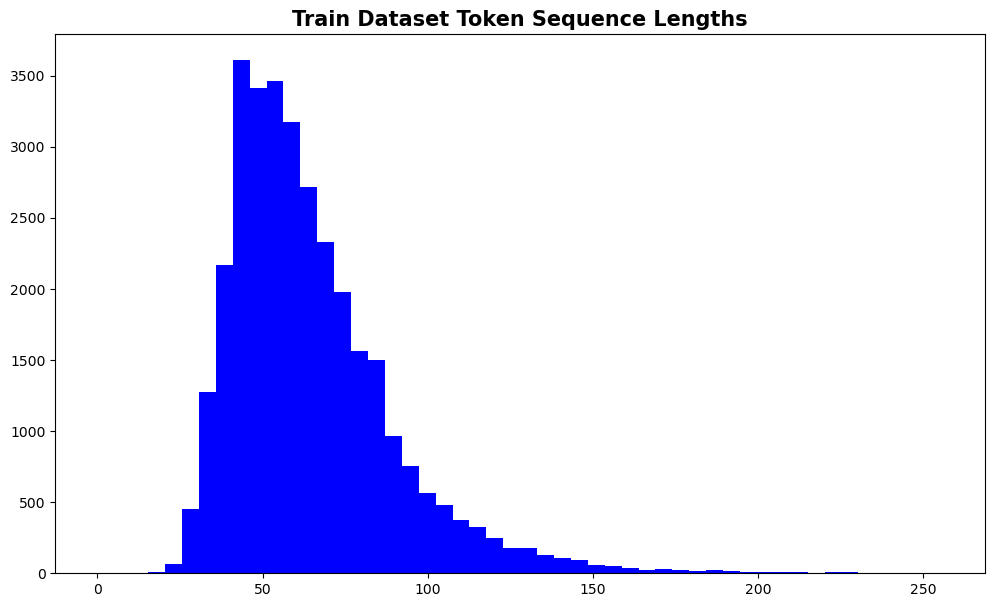

In [196]:
plt.figure(figsize=(12, 7))
plt.hist(train_lengths, bins=50, range=[0, 256], facecolor='b')
plt.title('Train Dataset Token Sequence Lengths', fontweight='bold', fontsize=15)

Text(0.5, 1.0, 'Test Dataset Token Sequence Lengths')

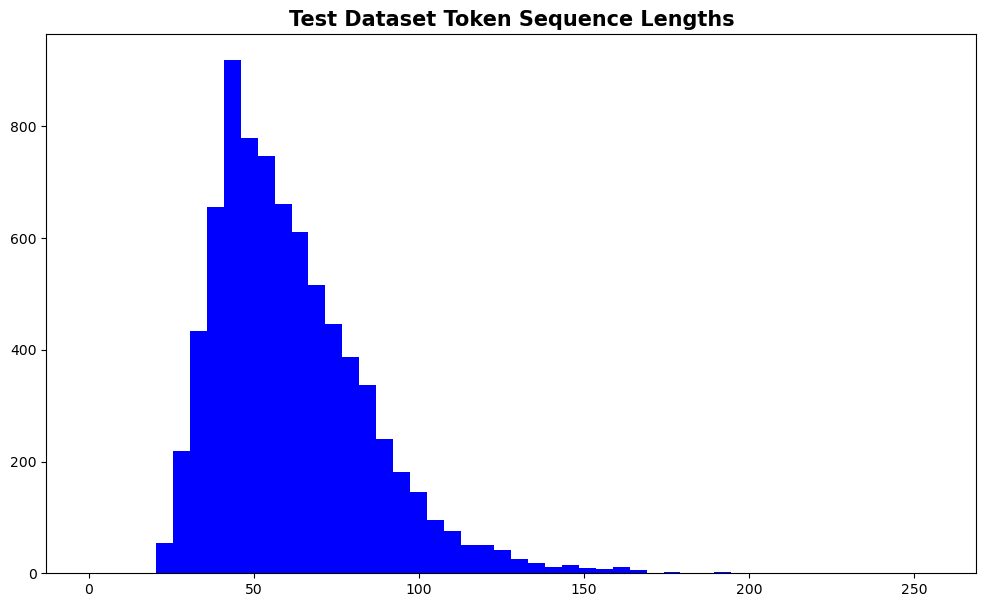

In [197]:
plt.figure(figsize=(12, 7))
plt.hist(test_lengths, bins=50, range=[0, 256], facecolor='b')
plt.title('Test Dataset Token Sequence Lengths', fontweight='bold', fontsize=15)